# Professional Certificate in Machine Learning and Artificial Intelligence - Capstone Project

Author: Sebastian Krawczuk


## Research Paper Behind the Dataset

The dataset was created by Arvind Prasad and supervised by Shalini Chandra (for their dissertation, I presume). The paper is titled: _"PhiUSIIL: A diverse security profile empowered phishing URL detection framework based on similarity index and incremental learning."_ and was published in "Computers & Security" Journal Volume 136, January 2024, 103545. It introduces a novel _PhiUSIIL_ framework for malicious website classification.

Paper DOI: https://doi.org/10.1016/j.cose.2023.103545

## PhiUSIIL Framework Summary

The framework consists of two distinct stages:
1. Calculation of URL Similarity Index (USI). 

The input URL is lexically compared to 10 million legitimate website URLs downloaded from Open PageRank Initiative - https://www.domcop.com/top-10-million-websites. USI score can be in range from `0.0` (no match) to `100.0` (100% match). Loading of the website is immediately blocked if the USI `>= 80` and `<100`. Hence strong indicator of visual-similarity attack (zero-width characters, homograph, punycode, homophone, combosquatting, etc). For example: `google-.com`. Score of `100.0` obviously indicates a valid website. If USI is `<80` then the 2nd stage is activated.

2. Incremental Learning Based Phishing URL Detection.

At this stage the website's first page is downloaded into a sandbox environment, features extracted from the URL itself, HTML code and JavaScript code. Researchers wrote a custom Java application for that. These features then are used by three independent pre-trained incremental ML algorithms to make a prediction: `BernoulliNB`, `PassiveAggressive`, and `SGDClassifier`.

The user can configure 3 security profiles:
* _Low Security Profile_: if 1 out of 3 models qualify the website as legitimate it is reported as such.
* _Medium Security Profile_: if 2 out of 3 models qualify the website as legitimate it is reported as such.
* _High Security Profile_: if 3 out of 3 models qualify the website as legitimate it is reported as such.

## The Dataset

The dataset was found at and downloaded from: https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

The dataset was built by the _PhiUSIIL_ researchers by actively monitoring _PhishTank_, _OpenPhish_ and _MalwareWorld_ services. That way they downloaded the malicious content before it can potentially disappear (usually cyber attack campaigns do not last long). They collected over 100,000 phishing websites from October 2022 until May 2023. The same technique was used to also identify and download over 100,000 legitimate websites.

As the end result, PhiUSIIL Phishing URL dataset contains `134,850` legitimate and `100,945` phishing URLs. Features were extracted from the URL, HTML and JavaScript source code of the webpage. 

Additional features were derived from the existing features. They include for example: `CharContinuationRate`, `URLTitleMatchScore`, `URLCharProb`, and `TLDLegitimateProb`.

In total, there is 54 features / variables and one URL classification label for supervised learning.

The data was donated to the general public on 3/3/2024 under [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) (CC BY 4.0) license.

#### Additional Variable Information

- Column "FILENAME" can be ignored.
- Class Labels: Label 1 corresponds to a legitimate URL, label 0 to a phishing URL.

## Features (Copied From the Publication)

### Features extracted from the URL
 - **TLD** - Top Level Domain. `.com` or `.edu`.
 - **URLLength** - length of URL. Phishing URLs are often longer than legitimate URLs.
 - **IsDomainIP** - IP address instead of a domain name can be a red flag for users.
 - **NoOfSubDomain** - Cyber criminals often use visual similarity techniques to trick users. They create subdomains that look like subdomain of legitimate websites.
 - **NoOfObfuscatedChar** -  Count of obfuscated characters in URL. Obfuscated URL `https://abc.com%6d` opens `https://abc.comm` and obfuscated URL `https://facebook.com@%61%62%63.%43%4F%4D` opens `https://abc-.com` and try to login `https://abc.com`.
 - **IsHTTPS** - Does URL use HTTPS or plaintext HTTP?
 - **NoOf[Degits | Equals | QMark | Ampersand | OtherSpecialChars ]** - A large number of digits or symbols such as `=`, `?`, `&` or `%` in a URL increases the possibility of being a phishing URL.

### Features extracted from the HTML content
 - **LargestLineLength** - Cyber criminals may use encrypted text to hide the actual code from the user. A longer single line of code may indicate code obfuscation.
 - **HasTitle** - Missing title tag may indicate a phishing page.
 - **HasFavicon** -  Missing a favicon tag may indicate a phishing scam.
 - **IsResponsive** - Most legitimate websites are responsive, which helps web content to be appropriately adapted across devices to give better readability and view. Fortunately, many phishing websites are not responsive, as threat actors find it challenging to ensure the responsiveness of their quickly designed websites on all major devices.
 - **NoOfURLRedirect** - Phishing sites may use redirects to fool users to a different page. HTML code may contain JavaScript or meta tags that redirect users to a different URL. The HTML tags such as `http-equiv`, `refresh`, `window.location`, `window.location.replace`, `window.location.href`, `http.open` can help identify URL redirection.
 - **HasDescription** -  Legitimate websites provide page descriptions with `description` meta name. Missing page descriptions may raise a red flag for a webpage.
 - **NoOfPopup**, **NoOfiFrame** - Phishing websites may use pop-ups or `iframe` to distract users and capture sensitive information.
 - **HasExternal**, **FormSubmit** - Phishing sites often use HTML forms to collect user information. Form submitting to an external URL can be a red flag.
 - **HasCopyrightInfo**, **HasSocialNet** - Most legitimate websites have copyright and their social networking information. Missing such information may indicate a phishing scam.
 - **HasPasswordField**, **HasSubmitButton** -  HTML allow users to input data and submit it to other URLs.
 - **HasHiddenFields** - Phishing websites may use hidden fields to capture sensitive information without the user’s knowledge.
 - **NoOfImage** - Threat actors can use screenshots of legitimate websites and design phishing websites to make them appear more legitimate. More images used in respectively small websites may indicate phishing websites.
 - **NoOfJS** - JavaScript (JS) is a programming language embedded in HTML to create interactive webpages. A large number of JavaScript included in a webpage can make it suspicious.
 - **NoOfSelfRef**, **NoOfEmptyRef**, **NoOfExternalRef** - Hyperlinks (`href`) are clickable links that allow users to navigate between webpages or navigate to external webpages. A large number of hyperlinks navigating to itself, navigating to empty links, or navigating to external links can be suspicious.

### Derived features
- **CharContinuationRate** - indicates how a URL contains letters, digits, or special characters. CharContinuationRate is the longest letter, digits, and special character sequence divided by total URL length. URLs such as www.abc.com, www.abc123.com, or www.abc_123.com will give same CharContinuationRate value. However, URLs such as www.a1b2c3.com or www.a1_b-_2.com get lower CharContinuationRate.
- **URLTitleMatchScore** - Cybercriminals often use social engineering tactics to trick users into believing a website is legitimate. They may use a URL that looks similar to a legitimate website and create a convincing webpage title reflecting the website’s content. We introduced URLTitleMatchScore to identify the discrepancy between the URL and the webpage title. A lower score can be a sign that the website is a phishing attempt because the webpage title does not match the content that is expected to be found on the website. A higher score 100 or close to 100 indicates that the website is what it claims to be.
- **URLCharProb** - While most legitimate URLs look meaningful, many phishing URLs contain random letters, digits, and misspelled words that do not look meaningful. Often, an attacker uses the typosquatting technique to create a URL similar to a legitimate URL but with small typographical errors. To understand the pattern of each letter and digit in a URL, we count the occurrence of each leter and digit in the 10 million legitimate URLs and divide them by the total count of all letters and digits of 10 million legitimate URLs. Further, to compare it with the pattern of phishing URLs, we collected 7 million phishing URLs and calculated the probability of each letter and digit using the same method. Most of the letters such as a, c, e, o, r, and t are more frequently used in legitimate URLs, while letters such as b, f, q, v, w, x, y, z, and all the digits are more frequent in phishing URLs.
- **TLDLegitimateProb** - Phishing attackers often use TLDs that are uncommon or unrelated to the purpose of the website they are trying to spoof. Legitimate websites often use specific TLDs associated with their industry or location. We extracted all the TLDs from the top 10 million websites and counted the occurrence of each TLD. Further, we calculated the ratio of each TLD by dividing the total occurrence of that TLD by the total occurrence of all the TLDs. A higher `TLDLegitimateProb` of a URL may indicate a legitimate URL, and a lower `TLDLegitimateProb` value may help identify phishing URLs.



## Import Libraries

In [1]:
# Core Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

# scikit-learn Modules
import sklearn
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Keras and Tensorflow Modules
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Set Global Options

In [2]:
# To display scikit-learn Pipeline stages as diagrams.
sklearn.set_config(display = 'diagram')

# Display Pandas float values in decimal format rather than scientific. 
pd.options.display.float_format = '{:.2f}'.format

## Load the Data

In [3]:
df = pd.read_csv('data/PhiUSIIL_Phishing_URL_Dataset.csv')

# Drop FILENAME column as indicated by the authors.
df.drop(columns = ['FILENAME'], inplace = True)

## Exploratory Data Investigation (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [5]:
df.shape

(235795, 55)

### Data Quality

#### Check a Few URLs For Accuracy

In [6]:
# groupby() will stratify output by label.
df.groupby(by = 'label').sample(n = 5, random_state = 0)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
8977,http://www.saiconsard.co.jp.mfouei.top/ai/sign...,50,www.saiconsard.co.jp.mfouei.top,31,0,top,36.92,0.48,0.00,0.06,...,0,0,0,0,0,0,0,0,0,0
229909,https://hrcnlnexzi.web.app/,26,hrcnlnexzi.web.app,18,0,app,48.67,0.79,0.00,0.05,...,0,0,0,0,0,0,0,0,3,0
94739,http://www.drkko.com,19,www.drkko.com,13,0,com,85.76,1.00,0.52,0.06,...,0,0,0,0,0,1,1,0,1,0
146590,http://www.allterdsmatter.com,28,www.allterdsmatter.com,22,0,com,77.58,1.00,0.52,0.06,...,0,0,0,0,0,1,1,0,1,0
158183,http://www.hbah.com,18,www.hbah.com,12,0,com,87.15,1.00,0.52,0.05,...,0,0,0,0,0,0,0,0,0,0
27469,https://www.portalradios.com.br,30,www.portalradios.com.br,23,0,br,100.00,0.81,0.01,0.06,...,0,0,1,51,3,7,85,4,8,1
175798,https://www.lagasta.com,22,www.lagasta.com,15,0,com,100.00,1.00,0.52,0.07,...,0,0,1,25,8,18,60,3,69,1
154335,https://www.fulminiesaette.it,28,www.fulminiesaette.it,21,0,it,100.00,1.00,0.01,0.06,...,0,0,1,91,10,10,205,0,207,1
108251,https://www.polandww2.com,24,www.polandww2.com,17,0,com,100.00,1.00,0.52,0.05,...,0,0,1,45,5,24,74,0,29,1
120893,https://www.ocweekly.com,23,www.ocweekly.com,16,0,com,100.00,1.00,0.52,0.06,...,0,0,0,20,18,26,93,1,101,1


Crosscheck URLs considered as phishing with phishtank.org:
 - http://www.saiconsard.co.jp.mfouei.top/ai/sign.php - found
 - https://hrcnlnexzi.web.app/ - found
 - http://www.drkko.com	- not found
 - http://www.allterdsmatter.com - not found
 - http://www.hbah.com - not found

Crosscheck URLs considered as legitimate with phishtank.org:
 - https://www.portalradios.com.br - not found
 - https://www.lagasta.com - not found
 - https://www.fulminiesaette.it - not found
 - https://www.polandww2.com - not found
 - https://www.ocweekly.com	- not found

Surpassingly 3 of out 5 sampled phishing URLs were not found with phishtank.org. We would need to check more URLs classified as phishing (if not all of them) with phishing URL data providers that the authors claimed they used. 

#### Missing Values and Duplicates

In [7]:
df.isna().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

In [8]:
df.duplicated().sum()

0

As the authors stated, there are no missing values and no duplicates. There's no data cleaning required then.

**Note: This is not true, more on that later.**

### Data Analysis

There are only 3 types of data: 
 - `string` (4) - Target URL and its decomposed intermediate parts and elements.
 - `integer` (41) - Lengths of URL and HTML as well as `0`/`1` encoded boolean values for `false` / `true` features.
 - `float` (10) - derived features with with probabilities or ratios.

#### String Features 

In [9]:
df.describe(include = 'object').T

,count,unique,top,freq
URL,235795,235370,https://disclosepack.myportfolio.com/,2
Domain,235795,220086,ipfs.io,1197
TLD,235795,695,com,112554
Title,235795,197874,0,32719


This is weird. Every single URL entry should be unique but they are not. 425 URLs are duplicated in fact. Let's investigate them.

In [10]:
df.query('URL == "https://disclosepack.myportfolio.com/"')

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
97557,https://disclosepack.myportfolio.com/,37,disclosepack.myportfolio.com,28,0,com,70.36,0.54,0.52,0.06,...,0,0,0,0,0,0,0,0,0,0
221720,https://disclosepack.myportfolio.com/,36,disclosepack.myportfolio.com,28,0,com,70.36,0.54,0.52,0.06,...,0,0,0,0,0,0,0,0,0,0


In [11]:
len('https://disclosepack.myportfolio.com/')

37

It looks like these two sampled identical URL entries are off by one `URLLength` value making them "ghost" duplicates. Perhaps coding error in the feature extraction or data processing software tool(s) developed by the original authors.

Let's see if there are more duplicate URLs perhaps?

In [12]:
value_counts = df['URL'].value_counts()
duplicated_urls = value_counts[value_counts > 1]
duplicated_urls = duplicated_urls.index
df_of_dup_urls = df[df['URL'].isin(duplicated_urls)].sort_values(by = 'URL')

In [13]:
df_of_dup_urls.head(6)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
219489,http://2f3a.reicrut-chat.workers.dev/,37,2f3a.reicrut-chat.workers.dev,29,0,dev,27.90,0.36,0.00,0.05,...,1,0,0,0,0,0,0,0,0,0
57609,http://2f3a.reicrut-chat.workers.dev/,36,2f3a.reicrut-chat.workers.dev,29,0,dev,27.90,0.36,0.00,0.05,...,1,0,0,0,0,0,0,0,0,0
227564,http://34.149.138.117/,21,34.149.138.117,14,1,117,38.23,0.40,0.00,0.00,...,0,1,0,4,1,5,48,0,9,0
27166,http://34.149.138.117/,22,34.149.138.117,14,1,117,38.23,0.40,0.00,0.00,...,0,1,0,4,1,4,48,0,9,0
147448,http://595221.selcdn.ru/qwerty-ohdhdjejnnad-na...,62,595221.selcdn.ru,16,0,ru,27.44,1.00,0.02,0.04,...,0,0,1,2,2,7,0,0,3,0
189978,http://595221.selcdn.ru/qwerty-ohdhdjejnnad-na...,63,595221.selcdn.ru,16,0,ru,27.44,1.00,0.02,0.04,...,0,0,1,2,2,7,0,0,3,0


In [14]:
df_of_dup_urls.shape

(850, 55)

In [15]:
df_of_dup_urls['label'].value_counts()

label
0    850
Name: count, dtype: int64

We have 425 duplicate URLs (`850 / 2`). At first sight, it looks like `URLLength` calculation is wrong and causes the duplicates. For each duplicated `URL` entry `URLLength` value is off by 1.

Also, all of these duplicates are in phishing URL category.

Could they be cleaned by just recalculating `URLLength`? Let's take one sample of a duplicated URL and check which columns are the two entries are different by. 

In [16]:
df_2_URLs = df.query('URL == "http://2f3a.reicrut-chat.workers.dev/"')

row1 = df_2_URLs.iloc[0]
row2 = df_2_URLs.iloc[1]

differences = row1 != row2
different_columns = differences[differences].index.tolist()
different_columns

['URLLength',
 'LetterRatioInURL',
 'DegitRatioInURL',
 'NoOfOtherSpecialCharsInURL',
 'SpacialCharRatioInURL']

We would need to recompute 5 features for the duplicated URLs. At least by looking at this one isolated sample. Who knows which columns the other URLs are different by? `URLLength` is trivial to recalculate but the other features require access to original authors's data and procedures to do this right. This is beyond the scope of this exercise.

I suggest we drop all these 850 "ghost" duplicates.

In [17]:
# Drop duplicated URLs
df.drop(index = df_of_dup_urls.index, inplace = True)
df.shape

(234945, 55)

#### Integer Features

In [18]:
df.describe(include = 'int').T

,count,mean,std,min,25%,50%,75%,max
URLLength,234945.00,34.52,41.35,13.00,23.00,27.00,34.00,6097.00
DomainLength,234945.00,21.44,9.10,4.00,16.00,20.00,24.00,110.00
IsDomainIP,234945.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00
TLDLength,234945.00,2.76,0.60,2.00,2.00,3.00,3.00,13.00
NoOfSubDomain,234945.00,1.17,0.60,0.00,1.00,1.00,1.00,10.00
HasObfuscation,234945.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00
NoOfObfuscatedChar,234945.00,0.02,1.88,0.00,0.00,0.00,0.00,447.00
NoOfLettersInURL,234945.00,19.38,29.11,0.00,10.00,14.00,20.00,5191.00
NoOfDegitsInURL,234945.00,1.87,11.90,0.00,0.00,0.00,0.00,2011.00
NoOfEqualsInURL,234945.00,0.06,0.94,0.00,0.00,0.00,0.00,176.00


There are a few areas of concern here. For example: `LargestLineLength`, `LineOfCode`, `NoOfPopup`, `NoOfiFrame`. These features have extreme cases of outliers. Min and 75% quartile are all `0.0` and then a really high max value.  

#### Float Features

In [19]:
df.describe(include = 'float').T

,count,mean,std,min,25%,50%,75%,max
URLSimilarityIndex,234945.00,78.56,28.92,0.16,57.31,100.00,100.00,100.00
CharContinuationRate,234945.00,0.85,0.22,0.00,0.68,1.00,1.00,1.00
TLDLegitimateProb,234945.00,0.26,0.25,0.00,0.01,0.08,0.52,0.52
URLCharProb,234945.00,0.06,0.01,0.00,0.05,0.06,0.06,0.09
ObfuscationRatio,234945.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35
LetterRatioInURL,234945.00,0.52,0.12,0.00,0.43,0.52,0.59,0.93
DegitRatioInURL,234945.00,0.03,0.07,0.00,0.00,0.00,0.00,0.68
SpacialCharRatioInURL,234945.00,0.06,0.03,0.00,0.04,0.05,0.08,0.40
DomainTitleMatchScore,234945.00,50.30,49.68,0.00,0.00,80.00,100.00,100.00
URLTitleMatchScore,234945.00,52.27,49.59,0.00,0.00,100.00,100.00,100.00


### Univariate Analysis

In [20]:
# Provide ordered list and mapping table (dictionary) for 'label' classification column. 
# This is needed for labeling plots and reports.
# 0 - Phishing URL
# 1 - Legitimate URL
url_classification_labels_list = ['Phishing URL', 'Legitimate URL']
url_classification_labels_map = { 
    0: url_classification_labels_list[0],
    1: url_classification_labels_list[1],
}

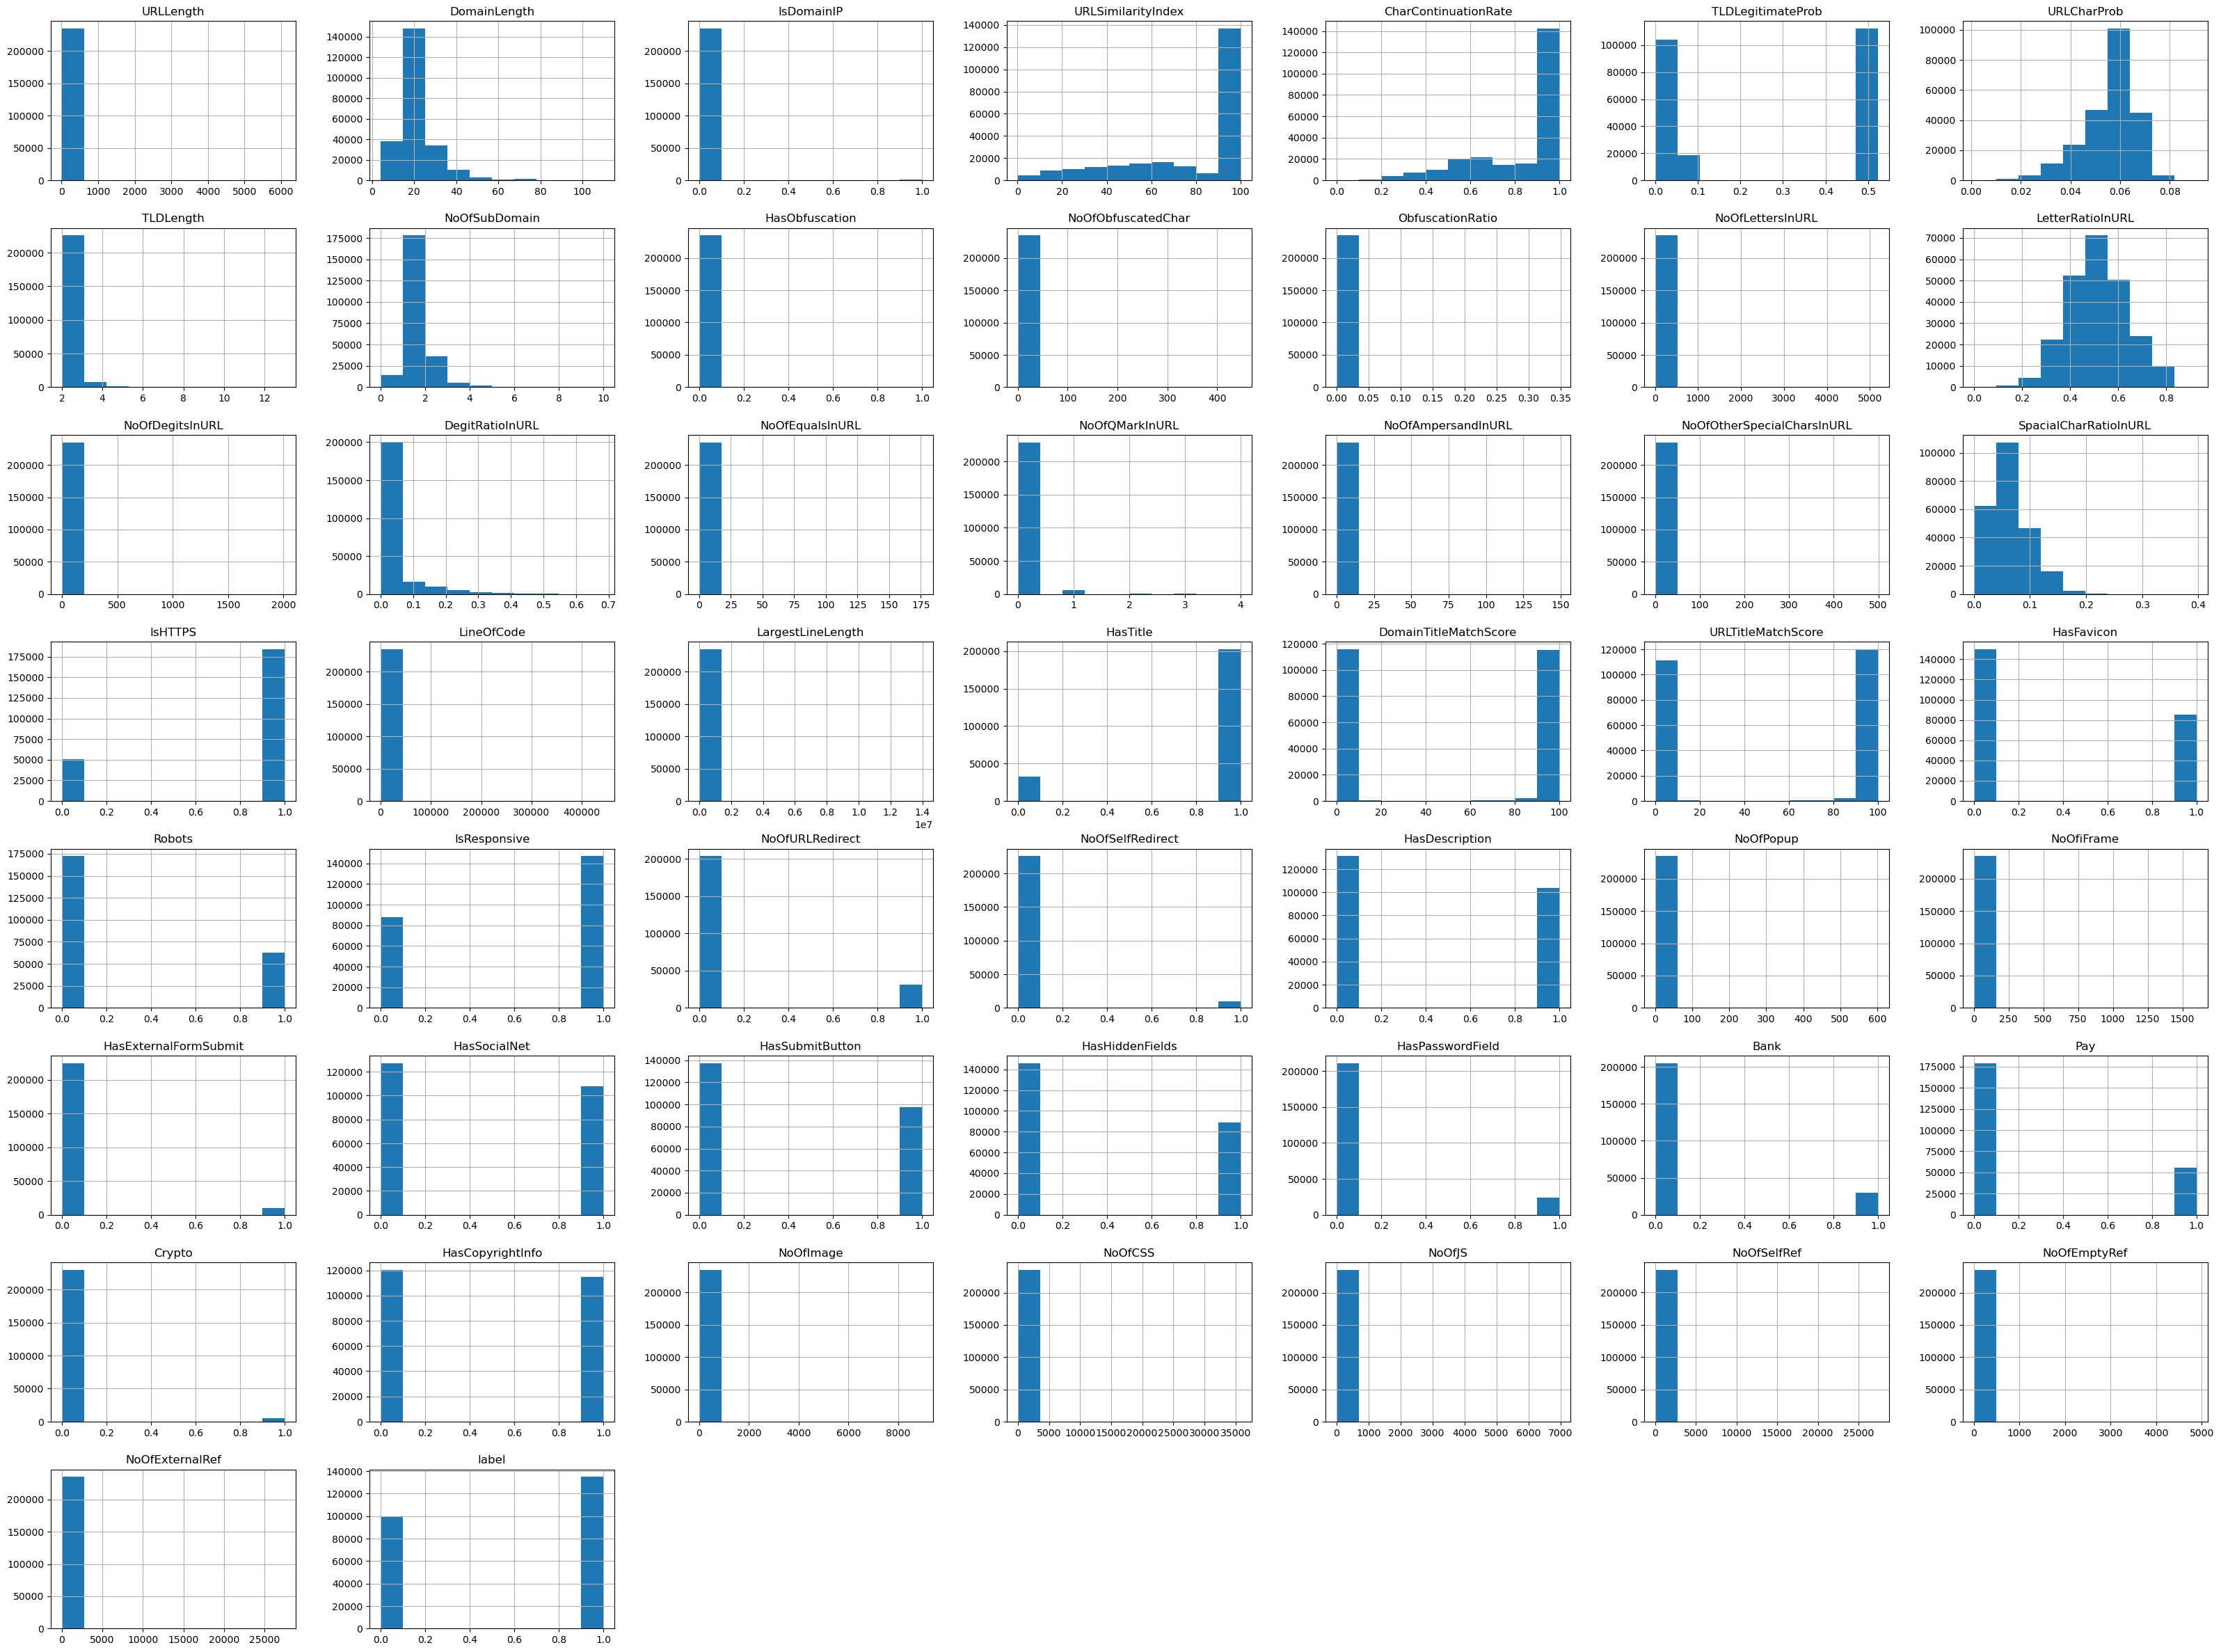

In [21]:
df.hist(figsize = (40, 30))
plt.show()

Quite a few of the boolean features (encoded as integer `1` or `0`) have zero-variance. This means they contain the same value in every sample(!). We should remove these zero- as well as low-variance variables (aka quasi-constants). They provide little to no value to our prediction model and may only confuse the model.

In [22]:
# Report Top-10 quasi-constant features using variance. 
# The biggest offenders (zero or near zero values) are on the top.
df.var(numeric_only = True).sort_values().head(10)

ObfuscationRatio        0.00
URLCharProb             0.00
SpacialCharRatioInURL   0.00
HasObfuscation          0.00
IsDomainIP              0.00
DegitRatioInURL         0.00
LetterRatioInURL        0.02
Crypto                  0.02
NoOfQMarkInURL          0.04
NoOfSelfRedirect        0.04
dtype: float64

#### Remove Low-Variance Features

In [23]:
# Remove all boolean features that are either 0 or 1 at more than 80% of the samples.
# From: https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold
vt_prob = 0.8
vt_threshold = vt_prob * (1 - vt_prob)
print('Variance threshold:', vt_threshold)

ct = ColumnTransformer(
    transformers = [
        ('vt', VarianceThreshold(vt_threshold), make_column_selector(dtype_include = np.number)),
        ('cat', 'passthrough', make_column_selector(dtype_include = object)),
    ],
    verbose_feature_names_out = False, # Do not prefix column names.
    n_jobs = -1,
)

transformed_data = ct.fit_transform(df)

print('Number of features before:', ct.n_features_in_)
print('Number of features after:', len(ct.get_feature_names_out()))
print('Features preserved:', ct.get_feature_names_out())

transformed_df = pd.DataFrame(transformed_data, columns = ct.get_feature_names_out())

Variance threshold: 0.15999999999999998
Number of features before: 55
Number of features after: 38
Features preserved: ['URLLength' 'DomainLength' 'URLSimilarityIndex' 'TLDLength'
 'NoOfSubDomain' 'NoOfObfuscatedChar' 'NoOfLettersInURL' 'NoOfDegitsInURL'
 'NoOfEqualsInURL' 'NoOfAmpersandInURL' 'NoOfOtherSpecialCharsInURL'
 'IsHTTPS' 'LineOfCode' 'LargestLineLength' 'DomainTitleMatchScore'
 'URLTitleMatchScore' 'HasFavicon' 'Robots' 'IsResponsive'
 'HasDescription' 'NoOfPopup' 'NoOfiFrame' 'HasSocialNet'
 'HasSubmitButton' 'HasHiddenFields' 'Pay' 'HasCopyrightInfo' 'NoOfImage'
 'NoOfCSS' 'NoOfJS' 'NoOfSelfRef' 'NoOfEmptyRef' 'NoOfExternalRef' 'label'
 'URL' 'Domain' 'TLD' 'Title']


In [24]:
# "transformed_df" columns are all "typeof(object") now after 
# ColumnTransformer process. Even DataFrame.infer_objects() does not help.
# 
# Hence, force correct types in "transformed_df" for each column using original types.
for col in ct.get_feature_names_out():
    orig_type = df.dtypes[col]
    transformed_df[col] = transformed_df[col].astype(orig_type)

In [25]:
# transformed_df.info()

In [26]:
# Double-check variance after removing low-variance features
transformed_df.var(numeric_only = True).sort_values().head(10)

IsHTTPS           0.17
Pay               0.18
Robots            0.20
HasFavicon        0.23
IsResponsive      0.23
HasHiddenFields   0.24
HasSubmitButton   0.24
label             0.24
HasDescription    0.25
HasSocialNet      0.25
dtype: float64

In [27]:
# Check if we do not have new duplicates after removing features.
transformed_df.duplicated().sum()

0

In [28]:
# Replace original data set.
df = transformed_df

In [29]:
# Takes too much time... TBD
# df.plot(kind = 'kde', figsize = (15, 15), subplots = False)
# plt.show()

label
Legitimate URL   57.40
Phishing URL     42.60
Name: count, dtype: float64


Text(0, 0.5, 'Number of Entries')

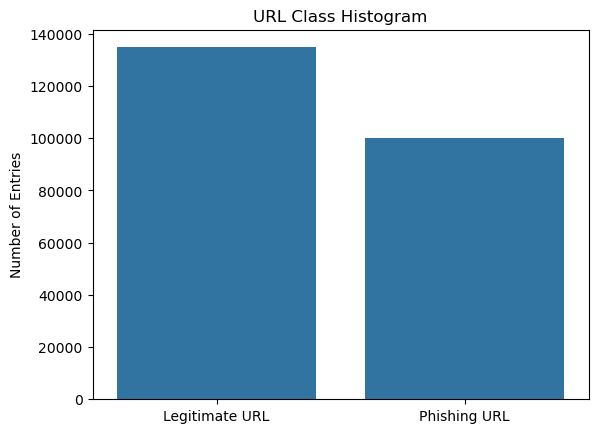

In [30]:
# Do some index shenanigans to replace 0 and 1 label integers with string labels for the plot.
label_dist = df['label'].value_counts()
label_dist.index = label_dist.index.map(url_classification_labels_map)
label_dist_percent = (label_dist / df.shape[0]).round(4).multiply(100)

print(label_dist_percent)
ax = sns.barplot(data = label_dist)
ax.set_title('URL Class Histogram')
ax.set_xlabel('')
ax.set_ylabel('Number of Entries')

The data seems reasonable balanced between URL classes. We have 57% legitimate URLs and 42% of malicious URLs.

## Multivariate Analysis - Correlation Matrix

In [31]:
cm = df.corr(numeric_only = 'True').round(3)
cm.shape

(34, 34)

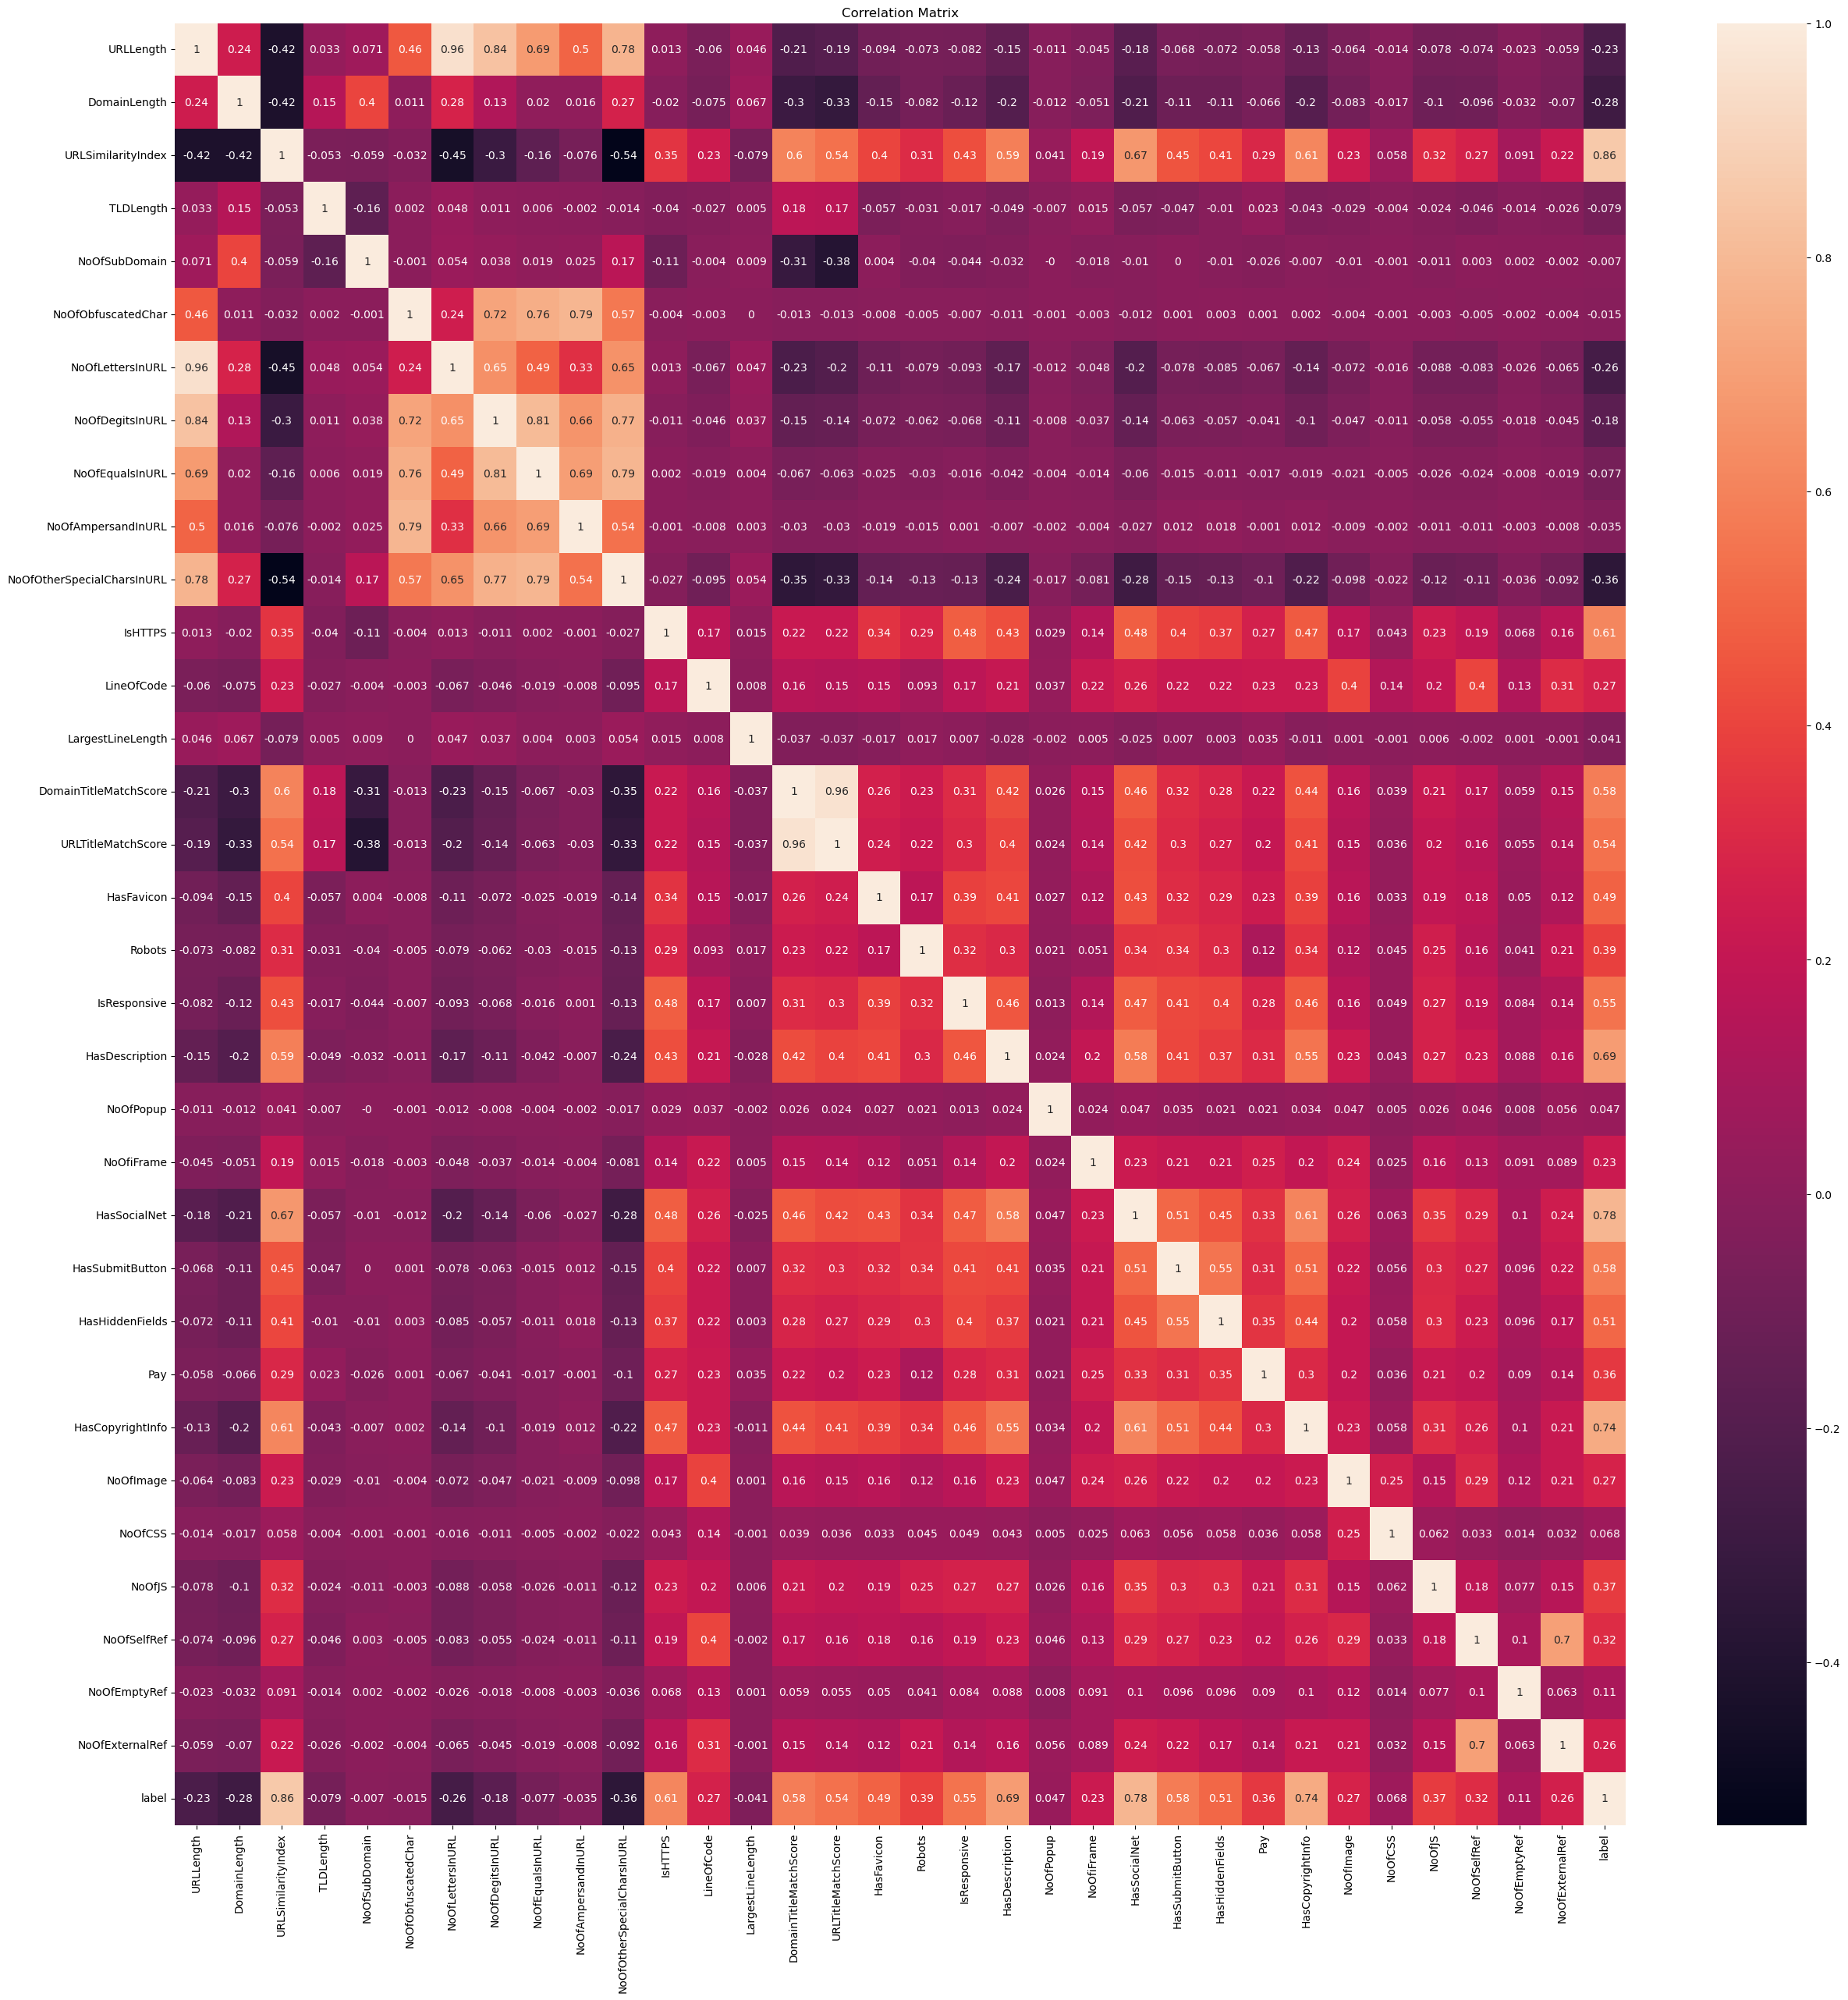

In [32]:
plt.figure(figsize = (30, 30))
ax = sns.heatmap(data = cm, annot = True,  xticklabels = True, yticklabels = True)
ax.set_title('Correlation Matrix')
ax.figure.savefig('images/CorrelationMatrix.png')

In [33]:
# Get all variables correlations against the target classification label and sort by their absolute value.
cm['label'].sort_values(key = np.abs, ascending = False)

label                         1.00
URLSimilarityIndex            0.86
HasSocialNet                  0.78
HasCopyrightInfo              0.74
HasDescription                0.69
IsHTTPS                       0.61
DomainTitleMatchScore         0.58
HasSubmitButton               0.58
IsResponsive                  0.55
URLTitleMatchScore            0.54
HasHiddenFields               0.51
HasFavicon                    0.49
Robots                        0.39
NoOfJS                        0.37
Pay                           0.36
NoOfOtherSpecialCharsInURL   -0.36
NoOfSelfRef                   0.32
DomainLength                 -0.28
NoOfImage                     0.27
LineOfCode                    0.27
NoOfExternalRef               0.26
NoOfLettersInURL             -0.26
URLLength                    -0.23
NoOfiFrame                    0.23
NoOfDegitsInURL              -0.18
NoOfEmptyRef                  0.11
TLDLength                    -0.08
NoOfEqualsInURL              -0.08
NoOfCSS             

### Correlation Matrix Findings

- There might be problems caused by multicollinearity between some features, like `URLLength` and `NoOfLettersInURL` (0.96).
- It looks like `URLSimilarityIndex`, `HasSocialNet`, `HasCopyrightInfo` (among many others) have very strong positive correlation with the Legitimate URL class. 
- Then `SpacialCharRatioInURL`, `DegitRatioInURL`, `LetterRatioInURL` have the strongest negative correlation with the Legitimate URL class, hence indicating potentially harmful URLs.


In [34]:
df.drop(columns = ['URLSimilarityIndex', 'IsHTTPS'], inplace = True)

## Classification Model Training and Validation

### Separation of Training and Test Data

In [35]:
# Remove the classification label and all irrelevant URL schema detail columns leaving numerical data only.
X = df.drop(columns = ['label', 'URL', 'Domain', 'TLD', 'Title'])

# Predict the classification label.
y = df['label']

# Stratify makes sure to balance target variable in training and test buckets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = df['label'])
y_train.value_counts()

label
1    101137
0     75071
Name: count, dtype: int64

### Create Column Normalization Transformer

This will normalize all numerical values. It is shared and used by all models trained down below. 

In [36]:
numerical_column_names = X_train.select_dtypes(include = 'number').columns
print(numerical_column_names)

transformer = make_column_transformer(
    (StandardScaler(), numerical_column_names),
    remainder = 'drop'
)

Index(['URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain',
       'NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDegitsInURL',
       'NoOfEqualsInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'Pay', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')


### Dummy Classifier Model

Fit a Dummy Classifier for a baseline to compare performance of other models to.

In [37]:
dummy_pipe = Pipeline([
    ('transform', transformer), 
    ('dummy', DummyClassifier()),
])
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain',
       'NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDegitsInURL',
       'NoOfEqualsInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'Pay', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object'))])),
                ('dummy', DummyClassifier())])

In [38]:
# Score on training data
dummy_pipe.score(X_train, y_train)

0.5739637246890039

In [39]:
# Score on test data
dummy_pipe.score(X_test, y_test)

0.5739653029606552

In [40]:
y_pred_test = dummy_pipe.predict(X_test)

In [41]:
# Use `zero_division = 0.0`` to suppress warnings of division by zero 
# due to Dummy Classifier always predicting one target value.
report = classification_report(
    y_test, 
    y_pred_test, 
    target_names = url_classification_labels_list, 
    output_dict = True, 
    zero_division = 0.0)
report_df = pd.DataFrame(report)
report_df

,Phishing URL,Legitimate URL,accuracy,macro avg,weighted avg
precision,0.00,0.57,0.57,0.29,0.33
recall,0.00,1.00,0.57,0.50,0.57
f1-score,0.00,0.73,0.57,0.36,0.42
support,25024.00,33713.00,0.57,58737.00,58737.00


We have a baseline score of `0.57` with `DummyClassifier`.

### Shared Code

In [42]:
# Shared function to display best tuned hyper-parameters and Confusion Matrix
def show_report_and_confusion_matrix(cv_search_ref, model_name):
    print('Scorer used:', cv_search_ref.scorer_)
    print('Best score:', cv_search_ref.best_score_)
    print('Best hyper-parameters:', cv_search_ref.best_params_)
    
    # Print Classification Report
    y_pred_test = cv_search_ref.predict(X_test)
    report = classification_report(
        y_test, 
        y_pred_test, 
        target_names = url_classification_labels_list, 
        output_dict = True)
    report_df = pd.DataFrame(report)
    print(report_df)
    
    # Plot and display Confusion Matrix
    conf_m = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(
        confusion_matrix = conf_m, 
        display_labels = url_classification_labels_list)
    disp.plot()
    title = 'Confusion Matrix of ' + model_name
    disp.ax_.set_title(title)

### KNeighborsClassifier Model

In [43]:
knn_pipe = Pipeline([
    ('transform', transformer),
    ('knn', KNeighborsClassifier(n_jobs = -1)),
])

In [44]:
param_grid = {
    'knn__n_neighbors': [1, 2, 5],
    'knn__weights': ['uniform', 'distance'],
}

In [45]:
start = time.time()
cv_search = GridSearchCV(knn_pipe, param_grid, scoring = 'recall', n_jobs = -1, verbose = 1)
cv_search.fit(X_train, y_train)
end = time.time()
print('Elapsed time in seconds:', (end - start))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Elapsed time in seconds: 123.55038690567017


Scorer used: make_scorer(recall_score, response_method='predict', average=binary)
Best score: 0.9940180166304847
Best hyper-parameters: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
           Phishing URL  Legitimate URL  accuracy  macro avg  weighted avg
precision          0.99            0.99      0.99       0.99          0.99
recall             0.99            0.99      0.99       0.99          0.99
f1-score           0.99            0.99      0.99       0.99          0.99
support        25024.00        33713.00      0.99   58737.00      58737.00


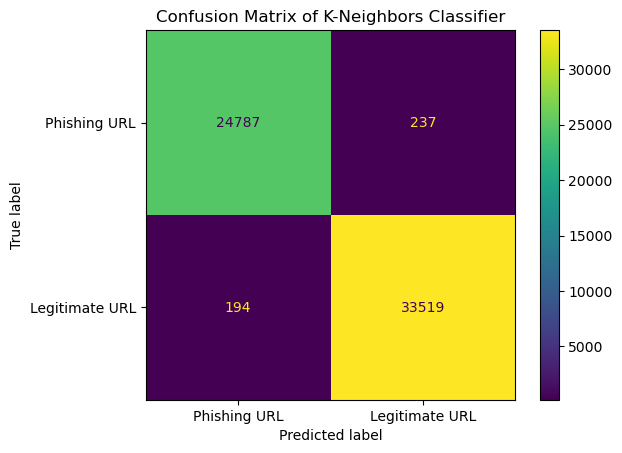

In [46]:
show_report_and_confusion_matrix(cv_search, 'K-Neighbors Classifier')

### LogisticRegression Model

In [47]:
lr_pipe = Pipeline([
    ('transform', transformer), 
    ('lr', LogisticRegression(random_state = 42)),
])

In [48]:
param_grid = {
    'lr__C': np.logspace(-2.0, 2.0, 20),
}

In [49]:
start = time.time()
cv_search = GridSearchCV(lr_pipe, param_grid, scoring = 'recall', n_jobs = -1, verbose = 1)
cv_search.fit(X_train, y_train)
end = time.time()
print('Elapsed time in seconds:', (end - start))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Elapsed time in seconds: 9.123493194580078


Scorer used: make_scorer(recall_score, response_method='predict', average=binary)
Best score: 0.9983388882241531
Best hyper-parameters: {'lr__C': 100.0}
           Phishing URL  Legitimate URL  accuracy  macro avg  weighted avg
precision          1.00            1.00      1.00       1.00          1.00
recall             1.00            1.00      1.00       1.00          1.00
f1-score           1.00            1.00      1.00       1.00          1.00
support        25024.00        33713.00      1.00   58737.00      58737.00


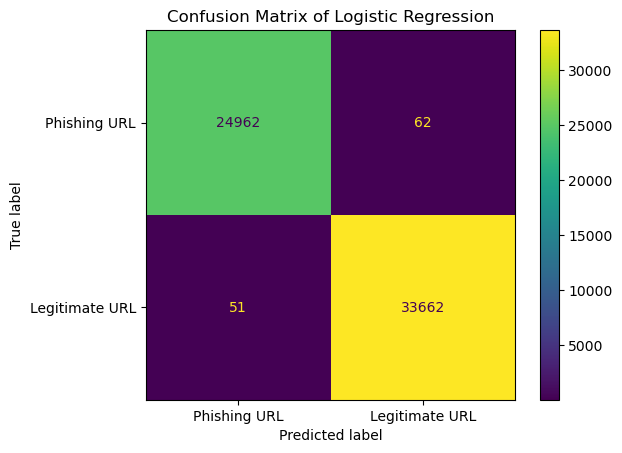

In [50]:
show_report_and_confusion_matrix(cv_search, 'Logistic Regression')

#### Extract and Plot LogisticRegression Coefficients

Coefficients: [[ -4.1769376    5.94982023  -0.1591921    0.79018946  -2.9656357
  -18.73197964 -20.70672493  -2.76428548  -2.55969353  -4.68253799
   23.30527466 -21.91931832   6.0940764   -5.37523093   0.49398514
   -0.15666928   0.05886152   1.02495462  -0.14183871  -0.82961076
    1.45979375   0.61036653   0.12269363   0.1839054    0.92999838
   23.15671367   5.15438921   6.77869639  26.70103469  -0.27044133
   19.3951063 ]]
Intercept: [22.1849565]


Text(0, 0.5, 'Feature Name')

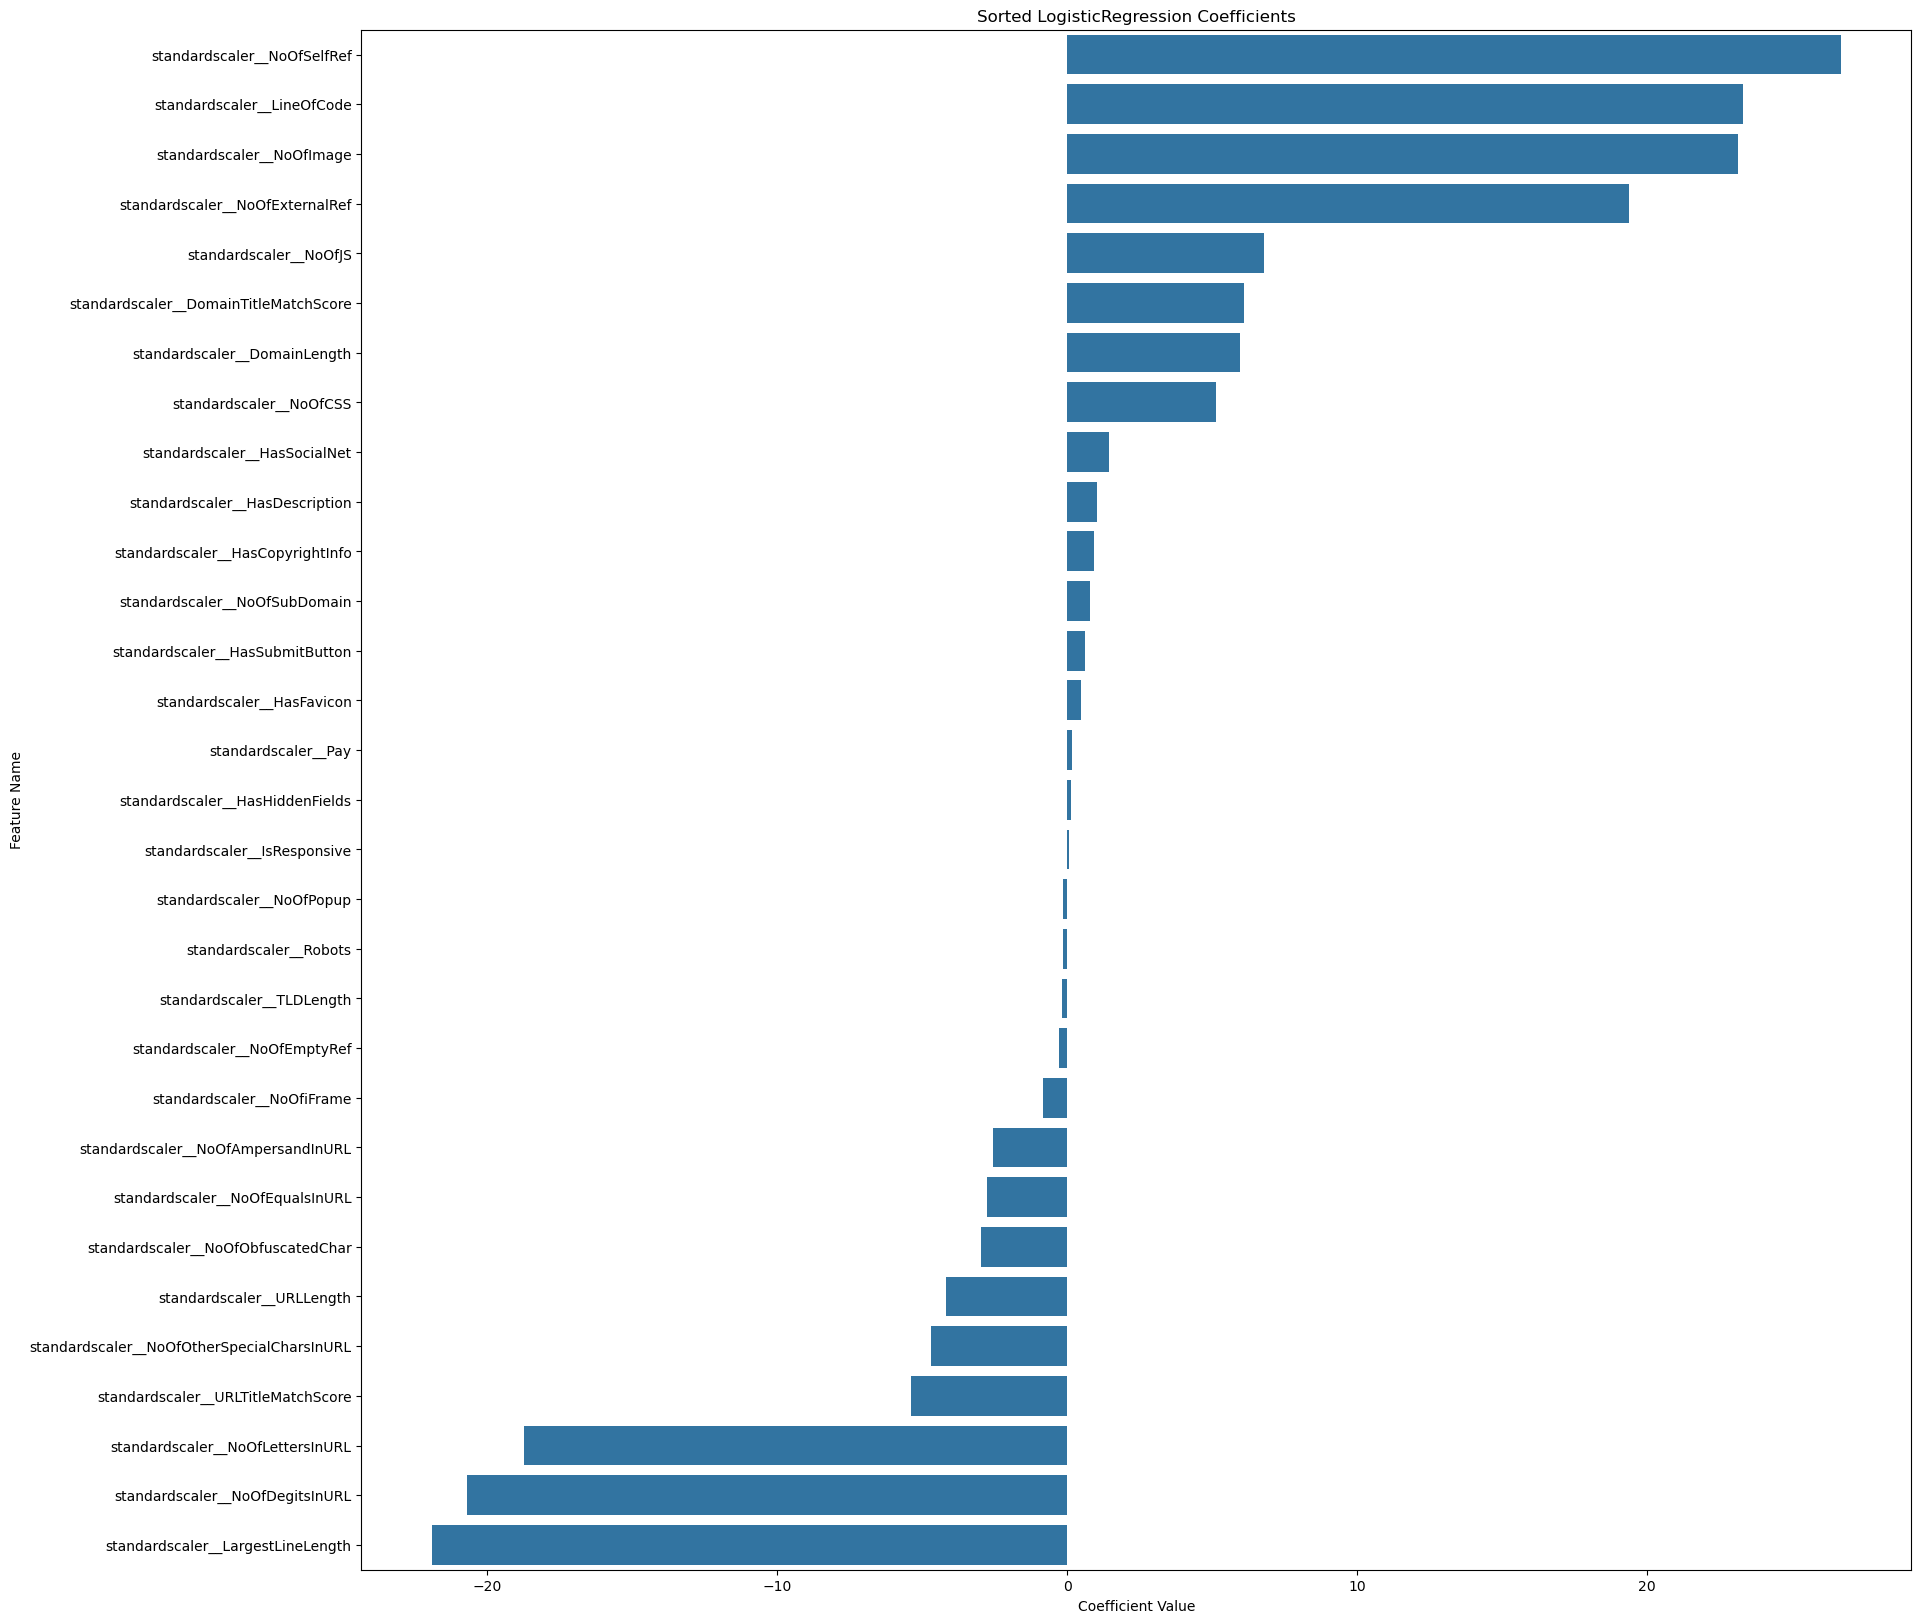

In [51]:
lr = cv_search.best_estimator_.named_steps['lr']
coefficients = lr.coef_
intercept = lr.intercept_
feature_names = cv_search.best_estimator_['transform'].get_feature_names_out()
print("Coefficients:", coefficients)
print("Intercept:", intercept)

coefficients_df = pd.DataFrame(coefficients, columns = feature_names)
coefficients_df = coefficients_df.T.sort_values(by = 0, ascending = False)
coefficients_df

plt.figure(figsize = (20, 20))
ax = sns.barplot(data = coefficients_df, y = coefficients_df.index, x = 0)
ax.set_title('Sorted LogisticRegression Coefficients')
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Feature Name')

You can see some similarities between Logistic Regression's coefficients and previously generated Correlation Matrix during EDA.

### DecisionTreeClassifier Model

In [52]:
dt_pipe = Pipeline([
    # DTC is invariant to normalization. Hence column transformer can be skipped.
    # ('transform', transformer),
    ('dt', DecisionTreeClassifier()),
])

In [53]:
param_grid = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': [1, 2, 5, 10, 50, 100],
    'dt__min_samples_leaf': range(1, 5),
}

In [54]:
start = time.time()
cv_search = GridSearchCV(dt_pipe, param_grid, scoring = 'recall', n_jobs = -1, verbose = 1)
cv_search.fit(X_train, y_train)
end = time.time()
print('Elapsed time in seconds:', (end - start))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Elapsed time in seconds: 37.397287130355835


Scorer used: make_scorer(recall_score, response_method='predict', average=binary)
Best score: 0.9984179894366626
Best hyper-parameters: {'dt__criterion': 'log_loss', 'dt__max_depth': 10, 'dt__min_samples_leaf': 3}
           Phishing URL  Legitimate URL  accuracy  macro avg  weighted avg
precision          1.00            1.00      1.00       1.00          1.00
recall             1.00            1.00      1.00       1.00          1.00
f1-score           1.00            1.00      1.00       1.00          1.00
support        25024.00        33713.00      1.00   58737.00      58737.00


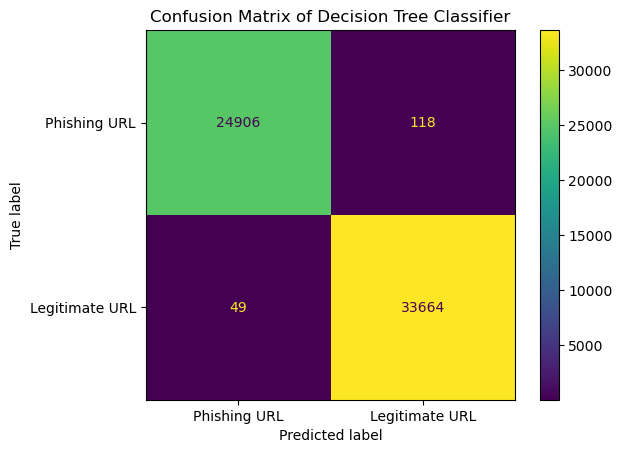

In [55]:
show_report_and_confusion_matrix(cv_search, 'Decision Tree Classifier')

#### Extract and Plot DTC Features Importance

In [56]:
dtc_feature_names = cv_search.best_estimator_['dt'].feature_names_in_
dtc_feature_importances = cv_search.best_estimator_['dt'].feature_importances_

dtc_important_features_df = pd.DataFrame({
    'Feature Name': dtc_feature_names, 
    'Importance': dtc_feature_importances,
    }).sort_values(by = 'Importance', ascending = False)
dtc_important_features_df.head(5)

,Feature Name,Importance
30,NoOfExternalRef,0.77
28,NoOfSelfRef,0.08
9,NoOfOtherSpecialCharsInURL,0.06
10,LineOfCode,0.05
3,NoOfSubDomain,0.01


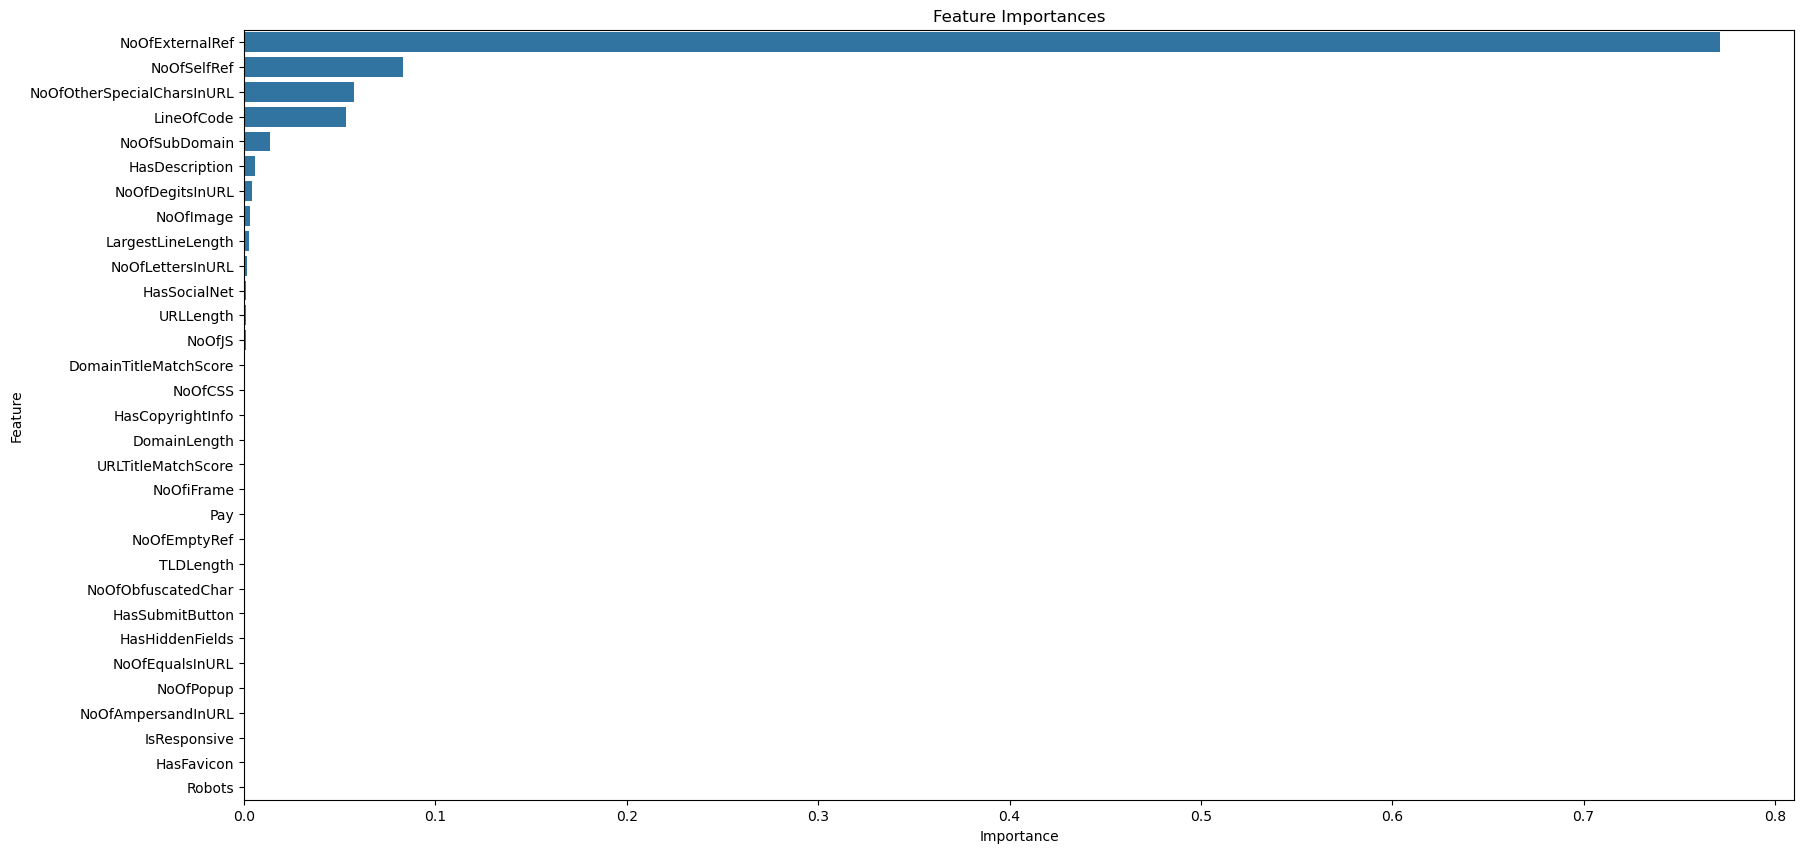

In [57]:
plt.figure(figsize = (20, 10))
sns.barplot(data = dtc_important_features_df, x = 'Importance', y = 'Feature Name', )
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Support Vector Classifier (SVC)

In [58]:
svc_pipe = Pipeline([
    ('transform', transformer), 
    ('svc', SVC(random_state = 42)),
])

In [59]:
param_grid = {
    #'svc__C': np.logspace(-2.0, 2.0, 2),
    #'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__kernel': ['linear'],
}

In [60]:
start = time.time()
cv_search = GridSearchCV(svc_pipe, param_grid, scoring = 'recall', n_jobs = -1, verbose = 3)
cv_search.fit(X_train, y_train)
end = time.time()
print('Elapsed time in seconds:', (end - start))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END ................svc__kernel=linear;, score=0.999 total time=  30.5s
[CV 5/5] END ................svc__kernel=linear;, score=0.999 total time=  31.5s
[CV 3/5] END ................svc__kernel=linear;, score=0.999 total time=  31.9s
[CV 2/5] END ................svc__kernel=linear;, score=1.000 total time=  32.0s
[CV 1/5] END ................svc__kernel=linear;, score=0.999 total time=  32.5s
Elapsed time in seconds: 62.60738205909729


Scorer used: make_scorer(recall_score, response_method='predict', average=binary)
Best score: 0.9992782047353599
Best hyper-parameters: {'svc__kernel': 'linear'}
           Phishing URL  Legitimate URL  accuracy  macro avg  weighted avg
precision          1.00            1.00      1.00       1.00          1.00
recall             1.00            1.00      1.00       1.00          1.00
f1-score           1.00            1.00      1.00       1.00          1.00
support        25024.00        33713.00      1.00   58737.00      58737.00


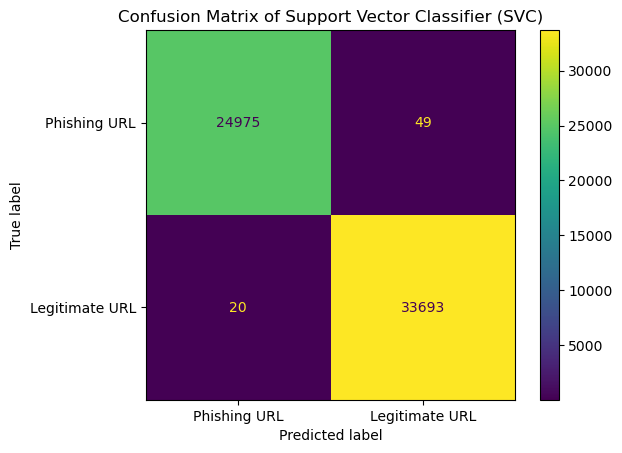

In [61]:
show_report_and_confusion_matrix(cv_search, 'Support Vector Classifier (SVC)')

### Deep Neural Network (DNN) Classifier

In [62]:
tf.random.set_seed(42)

In [63]:
dnn_model = Sequential([
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid'), # Configure a single output layer just for binary classification
])

In [64]:
dnn_model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy', # Configure loss estimator for binary classification
    metrics = ['accuracy'],
)

In [65]:
start = time.time()
dnn_history = dnn_model.fit(
    x = X_train, 
    y = y_train,
    validation_data = (X_test, y_test), 
    epochs = 10, 
    batch_size = 10,
    verbose = 1,
)
end = time.time()
print('Elapsed time in seconds:', (end - start))

Epoch 1/10


2024-07-30 15:02:53.207879: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


17621/17621 [==============================] - 7s 378us/step - loss: 2.7954 - accuracy: 0.9910 - val_loss: 0.0430 - val_accuracy: 0.9960
Epoch 2/10
17621/17621 [==============================] - 7s 391us/step - loss: 0.0990 - accuracy: 0.9960 - val_loss: 0.0250 - val_accuracy: 0.9979
Epoch 3/10
17621/17621 [==============================] - 7s 403us/step - loss: 0.0848 - accuracy: 0.9967 - val_loss: 0.0308 - val_accuracy: 0.9975
Epoch 4/10
17621/17621 [==============================] - 7s 381us/step - loss: 0.0735 - accuracy: 0.9968 - val_loss: 0.0292 - val_accuracy: 0.9979
Epoch 5/10
17621/17621 [==============================] - 7s 379us/step - loss: 0.0674 - accuracy: 0.9969 - val_loss: 0.0406 - val_accuracy: 0.9973
Epoch 6/10
17621/17621 [==============================] - 7s 377us/step - loss: 0.0708 - accuracy: 0.9970 - val_loss: 0.0214 - val_accuracy: 0.9981
Epoch 7/10
17621/17621 [==============================] - 7s 395us/step - loss: 0.0743 - accuracy: 0.9970 - val_loss: 0.034

In [66]:
print(dnn_history.history['accuracy'][-1])
print(dnn_history.history['val_accuracy'][-1])

0.9971851706504822
0.9974291920661926


In [67]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________


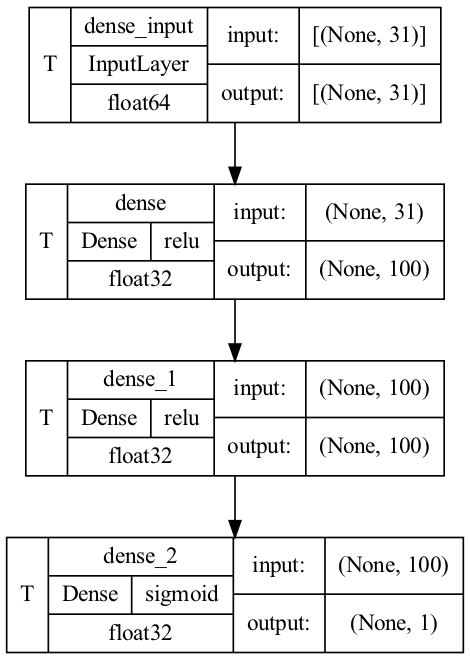

In [68]:
plot_model(
    model = dnn_model,
    to_file = 'images/dnn_model.png',
    # rankdir = 'LR',
    show_shapes = True,
    show_dtype = True,
    show_layer_names = True,
    show_layer_activations = True,
    show_trainable = True,
    dpi = 120,
)

In [69]:
# Generate prediction probabilities with DNN.
y_pred_test_prob = dnn_model.predict(X_test)

1836/1836 [==============================] - 0s 191us/step


In [70]:
# Convert probabilities to concrete predictions.
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

In [71]:
report = classification_report(y_test, y_pred_test, target_names = url_classification_labels_list, output_dict = True)
report_df = pd.DataFrame(report)
report_df

,Phishing URL,Legitimate URL,accuracy,macro avg,weighted avg
precision,1.00,1.00,1.00,1.00,1.00
recall,1.00,1.00,1.00,1.00,1.00
f1-score,1.00,1.00,1.00,1.00,1.00
support,25024.00,33713.00,1.00,58737.00,58737.00


Text(0.5, 1.0, 'Confusion Matrix of DNN Model')

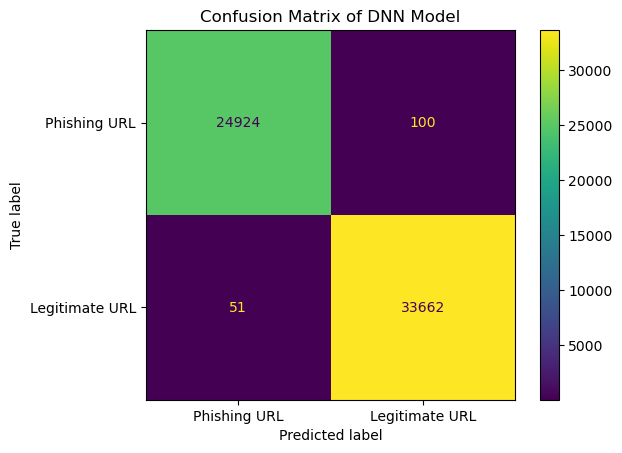

In [72]:
# Plot and display Confusion Matrix
conf_m = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(
    confusion_matrix = conf_m, 
    display_labels = url_classification_labels_list)
disp.plot()
disp.ax_.set_title('Confusion Matrix of DNN Model')

## Comparative Analysis of the Models

TBD

## Next Steps
- Try more classification models.
- Due to strong over-fitting even after low-variance feature elimination, select even less features and compare fidelity of such models with models trained on the current subset of features and full dataset. 
- Contact the original authors and recalculate all data for duplicated URL entries from existing intermediate data, like `URLLength`, etc.